In [3]:
'''
assume exponential utility and Gaussian distribution, here is a simplfied neural network to learn the fair measure transformation
based on dual problem and alpha is given by 3.2
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import random
from scipy.stats import multivariate_normal
import pandas as df
import random
import matplotlib.pyplot as plt
import time

np.random.seed(1)
random.seed(1)

# Define a class Gaussian Distribution to Generate the Gaussion Distribution in N-dimensions
class GaussianND:
    # initialize the class
    def __init__(self,n_samples,n_institutions,means,covariance):
        '''
        Input:  n_institutions: number N
              means: list 1 x N
              covariance: 2D array: N x N
        Output: Generate function: n_samples x N 
        '''
        # Initialize the parameters
        self.n_samples = n_samples
        self.N = n_institutions
        self.means = means
        self.covariance = covariance
        # Get the eigen value and eigen vectors, to help generate N-dimensional data
        self.eigen_values, self.eigen_vectors = np.linalg.eig(self.covariance)
    def generate(self):
        component = []
        for i in range(self.n_samples):
            z = np.random.normal(0,1,self.N)
            x = self.means
            #print(x,"\n",self.covariance,"\n",self.eigen_values, "\n",self.eigen_vectors)
            for j in range(self.N):
              x += np.sqrt(self.eigen_values[j])*z[j]*self.eigen_vectors[j]
            component.append(x)
        return component

def generate_sample(n_samples,n_institutions,means,covariance):
    '''
    return np.array: n_samples x n_institutions
    '''
    sample = GaussianND(n_samples,n_institutions,means,covariance).generate()
    #print(sample[0:3])
    #data = df.DataFrame(np.array(sample))#columns= ['Inst 1','Inst 2','Inst 3']
    return np.array(sample)

#generate a random positive semi-definite N*N integer matrix as integer covariace matrix, in [0,m]
def generate_covint(N,m):
    A = np.random.rand(N,N)*m
    D = np.dot(A,A.transpose())
    return D
#convert covariance to correlation matrix and sigma vector: cor = diag^{-1}*cov*diag^{-1}
def func_correlation(cov, N):
    diag = np.zeros((N,N))      #diagonal matrix
    sig = []
    for i in range(N):
        diag[i][i] = cov[i][i]
        sig.append(np.sqrt(cov[i][i]))
    inv_diag_sqrt = np.linalg.inv(np.sqrt(diag))
    #print("covariance\n", cov,"\ndiagnal matrix\n",diag,"\ninverse diag suare root(sigma)\n", inv_diag_sqrt)
    return (np.dot(np.dot(inv_diag_sqrt,cov),inv_diag_sqrt)), sig


# number of sample 
number_of_sample = 50000
number_of_test = 50000
n_institutions = 10

'''n_institutions = 10
def create_cov_mat(rho,sig):
  cor = np.zeros((n_institutions,n_institutions))+rho
  cor[np.diag_indices_from(cor)] = 1
  covariance = np.dot(np.dot(np.diag(sig),cor),np.diag(sig))
  if np.all(np.linalg.eigvals(covariance) > 0) and not np.iscomplex(np.linalg.eigvals(covariance)).any():
    return cor,covariance
  else:
    return False

means = [1] * n_institutions#[random.random()*3+0.1]*n_institutions #*5+.1
sig = [0.8]*n_institutions #random.uniform(0.1,1)
rho = random.random()*0.25+0.4
while not isinstance(create_cov_mat(rho,sig), tuple):
  rho = random.random()*0.25+0.4
cor_mat,covariance = create_cov_mat(rho, sig)

#covariance = np.dot(np.dot(np.diag(sig),cor_mat),np.diag(sig))
print("Correlation:\n",cor_mat,"\n and Standard deviation: ",sig )'''


means = sorted([(random.random()*3+0.1) for i in range(n_institutions)]) #*5+0.1

### control sigma < mean
covariance = generate_covint(n_institutions,1)
cor_mat = func_correlation(covariance, n_institutions)[0]
sig = [random.uniform(0,min(means[i],10)) for i in range(n_institutions)]
covariance = np.dot(np.dot(np.diag(sig),cor_mat),np.diag(sig))
print("Correlation:\n",cor_mat,"\n and Standard deviation: ",sig )
###


train_data = generate_sample(number_of_sample,n_institutions,means,covariance)
##val_data = generate_sample(number_of_val,n_institutions,means,covariance)
test_data = generate_sample(number_of_test,n_institutions,means,covariance)

Correlation:
 [[1.         0.76879721 0.79797391 0.63977286 0.76842207 0.84360741
  0.72712452 0.7690699  0.79973971 0.79321111]
 [0.76879721 1.         0.76460382 0.7065317  0.88868415 0.60437623
  0.73136608 0.71166309 0.82694093 0.81677252]
 [0.79797391 0.76460382 1.         0.68318876 0.73039232 0.71925062
  0.60672877 0.68101638 0.77336207 0.72565569]
 [0.63977286 0.7065317  0.68318876 1.         0.63893002 0.74890436
  0.7769598  0.6763403  0.79445986 0.89226057]
 [0.76842207 0.88868415 0.73039232 0.63893002 1.         0.64305234
  0.69972851 0.84298003 0.79555034 0.78864991]
 [0.84360741 0.60437623 0.71925062 0.74890436 0.64305234 1.
  0.81246161 0.76113303 0.6808991  0.84599023]
 [0.72712452 0.73136608 0.60672877 0.7769598  0.69972851 0.81246161
  1.         0.77072239 0.86664351 0.75449805]
 [0.7690699  0.71166309 0.68101638 0.6763403  0.84298003 0.76113303
  0.77072239 1.         0.76497694 0.70674911]
 [0.79973971 0.82694093 0.77336207 0.79445986 0.79555034 0.6808991
  0.866

In [4]:
#print(np.iscomplex(np.linalg.eigvals(covariance)))
#print(np.linalg.eigvals(covariance), np.linalg.eigvals(cor_mat))

In [5]:
means

[0.18504242956601893,
 0.38157876032270466,
 0.5030927323372036,
 0.8652070772182651,
 1.4484731943662146,
 1.586305261275823,
 2.0547789181682887,
 2.391323856929842,
 2.4661700534065396,
 2.642301210811698]

In [6]:
import torch
#import torchvision
#import torchvision.transforms as transforms
#import matplotlib.pyplot as plt
#import random
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

## Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

'''if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
'''

batch_size=1000
## Tensor Initialization
data_=torch.from_numpy(train_data).to(device)
dataset = torch.utils.data.TensorDataset(data_)
trainloader = torch.utils.data.DataLoader(dataset,batch_size, shuffle = False)
# validation data
##validation_data=torch.from_numpy(val_data).to(device)
# testing data
testdata=torch.from_numpy(test_data).to(device)
dataset = torch.utils.data.TensorDataset(testdata)
testloader = torch.utils.data.DataLoader(dataset,batch_size, shuffle = False)

In [7]:
device

device(type='cuda', index=0)

In [8]:
# NN: Generator, return -alpha_B
class Generator(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        input_dim: number of uniform rvs, i.e. n_institutions 
        hidden_dim: list of hidden layer dimensions
        output_dim: number of classes i.e. n_institutions 
        '''
        super(Generator, self).__init__()
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and nothing at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        x=self.model[-1](x)
        return x

class Alpha_Loss(nn.Module):
    def __init__(self,utility,u_parameters, B, lam):
        """
        input:
            dQ_dP: current tranformation, siz M x 1
            utility function: 'exp','...'
            parameter for utitlity function: list of u_paramaters
        """
        super(Alpha_Loss, self).__init__()
        self.u = utility
        self.u_parameters = torch.tensor(u_parameters,device = 'cuda:0')
        self.B, self.lam = B, lam
        
    def calculate_u(self, z):
        '''
        input:
          z - tensor(batch, N)
        return:
          tensor(batch), utilitiess or sum of u across N
        '''
        if self.u == 'exp':
          return torch.sum(-torch.exp(-z*self.u_parameters)/self.u_parameters, dim=1)
        
    def forward(self, dQ_dP, Z):
        """
        input:
            Z -- inputs: M x N
        return: value of loss function
        """
        # control lost
        sum_trans_Z = torch.reshape(torch.sum(Z, 1),(-1,1))*dQ_dP
        sum_u = self.calculate_u(Z)
        
        self.term1 = self.B - torch.mean(sum_u)
        self.term2 = torch.mean(sum_trans_Z)
        return torch.mean(sum_trans_Z)  + self.lam*torch.relu(self.B - torch.mean(sum_u))
    def print_loss(self):
        print("B-sum u_n",self.term1.item())
        print("-alpha",self.term2.item())


In [9]:
# Neural Networks: approximate rho
class Net(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        uniform tranformation for X_i, thus input 1-d and output 1-d
          input_dim: N
          hidden_dim: list of hidden layer dimensions
          output_dim: 1
        '''
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and relu at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        #x=self.model[-1](x)
        x = torch.log(1 + torch.exp(self.model[-1](x)))# torch.relu(self.model[-1](x))+0.01
        return x/torch.mean(x)

class Loss(nn.Module):
    def __init__(self, u_paramaters, B):
        super(Loss, self).__init__()
        self.alphas = torch.tensor(u_paramaters).to(device)
        self.B = B
        self.beta = self.calculate_par()

    def calculate_par(self):
        beta = 0
        for alpha in self.alphas:
          beta += 1/alpha
        return beta
        
    def forward(self,data,dQ_dP,loss_alpha):
        """
        input:
            dQ_dP -- inputs: M x 1, generated from X by NN
            loss_alpha -- minimized 1 x 1 tensor under current dQ_dP, i.e. -alpha
        return: value of loss function
        """
        # control lost
        sum_X = torch.reshape(torch.sum(data, 1),(-1,1))
        
        return torch.mean(sum_X*dQ_dP, 0)  - loss_alpha

In [10]:
#u_parameters = sorted([random.uniform(0.8, 3) for i in range(n_institutions)]) #[1,2,3]

u_parameters  = [1.1122798436470818,#0.8676421969658913,
  1.2,
 1.3600655431719748,
 1.8948894071014162,
 1.942496453417903,
 2.0424170726028246,
 2.26928838290612,
 2.3344025824476655,
 2.6278998816486365,
 2.9867918993531175]

a =[round(num,3) for num in u_parameters]


In [11]:
utility, B, lam_alpha  = 'exp',-1,5

input_dim= n_institutions     # how many Variables are in the dataset
hidden_dim = [64,64]#[64,32]          # hidden layer dimensions
#output_dim= n_institutions   # number of classes


## Instantiating the transformer
net = Net(input_dim,hidden_dim ,1).to(device)
criterion = Loss(u_parameters,B)
learning_rate = 0.001#0.0005#0.0002#0.0002#0.0001
optimizer = optim.SGD(net.parameters(), lr=learning_rate,weight_decay=0.0001)

generator = Generator(n_institutions,[64,64],n_institutions).to(device)
gen_criterion = Alpha_Loss(utility,u_parameters, B, lam_alpha)
gen_optimizer = optim.SGD(generator.parameters(), lr=0.0015, weight_decay=0.0001)#0.001


In [12]:
device

device(type='cuda', index=0)

In [16]:
## 3. Training the neural network model
num_epochs = 2000

l_set = []
for j in range(1):
  print("Net {}".format(j+1))
  error_rate_paths=[[],[]]
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      if (epoch+1) % 500 == 0 and epoch+1<num_epochs:
        optimizer.param_groups[0]['lr'] /= 10
      #if (epoch+1) % 500 == 0 and epoch+1<num_epochs:
        gen_optimizer.param_groups[0]['lr'] /= 10
        gen_criterion.lam *=2

        

      print_bool = False
      if (epoch+1) % 50 ==0: 
        print_bool = True
        print("Epoch {}/{}".format(epoch+1,num_epochs))

      running_loss = 0.0
      dQ_dP = torch.tensor([])
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [N-dim inputs]
          input = data[0]
          # zero the parameter gradients, before each instance
          optimizer.zero_grad()
          # forward + backward + optimize
          output = net(input.float())   #dQ/dP , 500 x 1

          gen_optimizer.zero_grad()
          Z = generator(input.float())
          loss_alpha = gen_criterion(output,Z)

          loss = criterion(input,output,loss_alpha)
          loss.backward()

          for par in generator.parameters():
            par.grad *= -1
          gen_optimizer.step()
          optimizer.step()    # Does the update
          

          # print statistics
          running_loss += loss.item()
      l_set.append(running_loss / (i+1))
      if print_bool:
        print("Learn -rho, Training Loss: {:.3f}".format(running_loss / (i+1)))
  end_time = time.time()
  gen_criterion.print_loss()
  print('Finished Training for Net ',j+1)
  print(f"training time is {(end_time-start_time)/60:.2f} minutes")
 

Net 1
Epoch 50/2000
Learn -rho, Training Loss: 3.999
Epoch 100/2000
Learn -rho, Training Loss: 3.992
Epoch 150/2000
Learn -rho, Training Loss: 3.992
Epoch 200/2000
Learn -rho, Training Loss: 3.996
Epoch 250/2000
Learn -rho, Training Loss: 3.997
Epoch 300/2000
Learn -rho, Training Loss: 3.996
Epoch 350/2000
Learn -rho, Training Loss: 3.995
Epoch 400/2000
Learn -rho, Training Loss: 3.995
Epoch 450/2000
Learn -rho, Training Loss: 3.995
Epoch 500/2000
Learn -rho, Training Loss: 3.825
Epoch 550/2000
Learn -rho, Training Loss: 3.871
Epoch 600/2000
Learn -rho, Training Loss: 3.869
Epoch 650/2000
Learn -rho, Training Loss: 3.869
Epoch 700/2000
Learn -rho, Training Loss: 3.869
Epoch 750/2000
Learn -rho, Training Loss: 3.869
Epoch 800/2000
Learn -rho, Training Loss: 3.870
Epoch 850/2000
Learn -rho, Training Loss: 3.870
Epoch 900/2000
Learn -rho, Training Loss: 3.870
Epoch 950/2000
Learn -rho, Training Loss: 3.870
Epoch 1000/2000
Learn -rho, Training Loss: 3.835
Epoch 1050/2000
Learn -rho, Traini

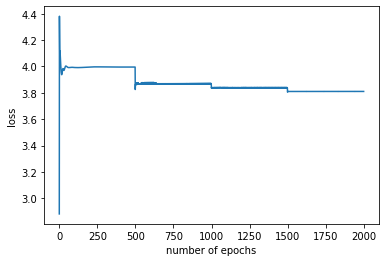

In [17]:
plt.plot(np.arange(num_epochs),l_set)# s = 0.1
#plt.ylim((52,53))
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.show() 

In [13]:
class ExpExample:
  def __init__(self,data,u_parameters, B):
    '''
    data: sample size M x N
    u_parameters: list, alpha's of exponential utility
    B: number
    Notes:  calculate explicit result presented in Thm 6.2, wich group size h=1
            "expentation" is calculated by sample, not MGF of X
    '''
    self.X = data
    self.alphas = u_parameters
    self.B = B
    self.beta, self.inv_alpha = self.calculate_par()   # inv_alpha is a tensor
    self.M = self.X.size(dim=0)
    self.N = self.X.size(dim=1)
    self.sum_X = torch.sum(self.X, 1)
    self.d,self.exp_X, self.mean_exp_X = self.calculate_d()
    self.Y = self.calculate_Yk()
    self.EQ_Y = self.EQ_Y()
    self.QP = self.Q()


  def calculate_par(self):
    beta = 0
    inv_alpha = []
    for alpha in self.alphas:
      beta += 1/alpha
      inv_alpha.append(1/alpha)
    inv_alpha = torch.tensor(inv_alpha, requires_grad=True).to(self.X.device)
    return beta,inv_alpha

  def calculate_d(self):
    exp_X = []
    for i in range(self.M):
      exp_X.append(torch.exp(-self.sum_X[i]/self.beta))
    exp_X=torch.tensor(exp_X, requires_grad=True).to(self.X.device)
    emp_mgf = torch.mean(exp_X)
    d = self.beta * torch.log(-self.beta/self.B * emp_mgf)
    return d,exp_X,emp_mgf

  def calculate_Yk(self):
    '''
    return: Y of size (M,N)
    '''
    Y = -self.X
    for i in range(self.M):
      # calculate every vector Y = (Y^1,...Y^N) line by line: Y = -X + 1/beta * (X_bar+d) * ALPHA(1,N)
      #print(self.sum_X[i].size,self.d,"\n",torch.add(self.sum_X[i],self.d),"\n times vector",torch.mul(self.d,self.inv_alpha))
      Y[i] += 1/self.beta *torch.add(self.sum_X[i],self.d) * self.inv_alpha
    return Y
  
  def calculate_Eu(self):
    '''
    return: sum of u_n(X^n+Y^n)
    '''
    sum_u = []
    for j in range(self.M):
      sum = 0
      for i in range(self.N):
        sum += -torch.exp(-self.alphas[i]* (self.X[j][i]+self.Y[j][i]))/self.alphas[i]
      sum_u.append(sum)
    sum_u=torch.tensor(sum_u, requires_grad=True).to(self.X.device)
    return torch.mean(sum_u)

  def EQ_Y(self):
    '''
    return: fair risk allocations E_{Q}[Y^n]
    '''
    trans_Yk = self.Y
    for i in range(self.M):
      trans_Yk[i] *= self.exp_X[i]/self.mean_exp_X
    EQ_Yk = torch.mean(trans_Yk,dim = 0)  #mean for each column i.e. n
    EQ_Yk = torch.tensor(EQ_Yk, requires_grad=True).to(self.Y.device)
    return EQ_Yk

  def Q(self):
    '''
    return: fair measure density dQ/dP
    '''
    return (self.exp_X/self.mean_exp_X).to(self.Y.device)

Example = ExpExample(testdata,u_parameters, B)#.to(device)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [14]:
print("Overall risk/d/optimal of sum Y", Example.d.item())

Overall risk/d/optimal of sum Y -3.9717316506458826


In [15]:
print("Individual risk/d/optimal Y^k", torch.mean(Example.Y,0))

Individual risk/d/optimal Y^k tensor([ 1.1173,  0.8898,  0.7426,  0.1815, -0.4696, -1.0767, -0.1602, -0.7455,
        -2.3382, -2.1129], device='cuda:0', dtype=torch.float64,
       grad_fn=<MeanBackward1>)


In [18]:

# Numerial: check accuracy of predicted fair individual allocation, with test data

output = torch.tensor([]).to(device)
l_alpha = 0.0
l = 0.0
for i, data in enumerate(testloader, 0):
  testinput = data[0]
  testoutput = net(testinput.float())  
  testZ = generator(testinput.float())
  loss_alpha = gen_criterion(testoutput,testZ)
  loss = criterion(testinput,testoutput,loss_alpha)
  l_alpha += loss_alpha.item()
  l += loss.item()
  output = torch.cat([output,testoutput])
print("Testing loss: {:.3f}".format(l / (i+1)))

diff = output.view(-1) - Example.QP

relative_error = torch.mean(diff**2)**0.5/ torch.mean(Example.QP**2)**0.5
print("From numerical, mean is ",torch.mean(output), 'optimal mean is',torch.mean(Example.QP) )
print(f"Relative L2 Error rate for over 50000 samples: {relative_error.item()*100:.2f}%.")

Testing loss: 3.812
From numerical, mean is  tensor(1., device='cuda:0', grad_fn=<MeanBackward0>) optimal mean is tensor(1., device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
Relative L2 Error rate for over 50000 samples: 6.12%.


In [19]:

# alpha =beta * E[dQ_dP * ln(dQ_dP)]+beta * ln(-B/beta)
print('Estimated alpha: ', -l_alpha/(i+1), '\nTheoritical alpha on formula (3.13): ',Example.beta*torch.mean(Example.QP*torch.log(Example.QP),0)+Example.beta*np.log(-Example.B/Example.beta))

Estimated alpha:  -8.671496906280517 
Theoritical alpha on formula (3.13):  tensor(-8.6425, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)


Metric to evaluate $dQ/dP$

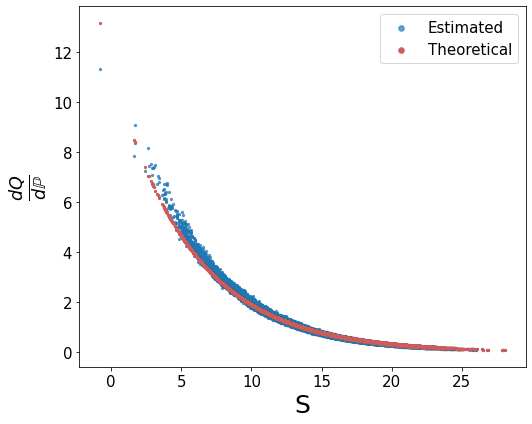

In [20]:
#===================================================#
# figure setup fonts and so on... 
# the label and font size should be adjusted such that 
# the figure fits well into ACM template
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=22) 
plt.rc('axes', labelsize=25)
plt.rcParams["figure.figsize"] = (7.5, 6)
#===================================================#

## Graph fitting
fig = plt.figure()
plt.scatter(torch.sum(testdata,1).detach().cpu().numpy(),output.detach().cpu().numpy(),s = 5,label = "Estimated", alpha = 0.7)
plt.scatter(torch.sum(testdata,1).detach().cpu().numpy(),Example.QP.detach().cpu().numpy(),s = 5, color="indianred", label = "Theoretical")

#plt.ylim(0,10)
plt.xlabel("S")# = \sum_{n=1}^N X^n
plt.ylabel(r"$\frac{dQ}{d\mathbb{P}}$")
#plt.legend()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.tight_layout()
fig.savefig("dQdP_vs_sumX.pdf")

In [21]:
## Relative Entropy
def relative_entropy(QP_hat,QP):
  relative_e = torch.sum(QP_hat * torch.log(QP_hat/QP))
  return relative_e
print("KL divergence: ",relative_entropy(output.view(-1),Example.QP)/number_of_test)
#mid_dist = (output.view(-1) + Example.QP)/2
#print("Jensen-Shannon divergence: ",relative_entropy(output.view(-1),mid_dist)/2+relative_entropy(mid_dist,Example.QP)/2)

KL divergence:  tensor(0.0016, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward0>)


In [22]:
## Wasserstein Distance:  the minimum amount of “work” required to transform one to another
from scipy.stats import wasserstein_distance
print("Wasserstein Distance: ",wasserstein_distance(output.view(-1).cpu().detach().numpy(),Example.QP.cpu().detach().numpy()))

Wasserstein Distance:  0.034588065255513084


In [26]:
## Another Relative L1
re_1 = torch.mean(torch.abs(diff))/ torch.mean(torch.abs((Example.QP))) # output.view(-1) +
print(f"Relative L1 Error rate: {re_1.item()*100:.2f}%.")

Relative L1 Error rate: 4.55%.


In [ ]:
## Another Relative L2
re_2 = torch.mean(diff**2)**0.5/ torch.mean((output.view(-1) + Example.QP)**2)**0.5
print(f"Relative L2 Error rate: {re_2.item()*100:.2f}%.")

Relative L2 Error rate: 2.80%.


**Compare $E_Q[Y^n]$**

In [ ]:
## Copy from learning for risk measures.... train NN to get Y's
# Neural Networks
class Net_Y(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        input_dim: how many variables are in the dataset, i.e. n_institutions 
        hidden_dim: list of hidden layer dimensions
        output_dim: number of classes i.e. n_institutions 
        '''
        super(Net_Y, self).__init__()
        # an affine operation: y = Wx + b
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and nothing at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        #x=F.leaky_relu(self.model[-1](x))
        #x=torch.exp(self.model[-1](x))
        x=self.model[-1](x)
        return x

class Loss_Y(nn.Module):
    def __init__(self, utility,u_paramaters, B, lam, mu):
        """
        input:
            utility function: 'exp','...'
            parameter for utitlity function: list of u_paramaters
        """
        super(Loss_Y, self).__init__()
        self.u = utility
        self.u_parameters = torch.tensor(u_paramaters, device="cuda")
        self.B, self.lam, self.mu  = B, lam, mu
        
    def calculate_u(self, x):
        if self.u == 'exp':
          return torch.sum(-torch.exp(-x*self.u_parameters)/self.u_parameters, dim=1)
        
    def forward(self, X, Y):
        """
        input:
            X -- inputs: M x N
            Y -- outputs: M x N
        return: value of loss function
        """
        M = X.size(dim=0)
        # control lost
        sum_Y = torch.sum(Y, 1)
        sum_u = self.calculate_u(X+Y)
        
        self.term1 = self.B - torch.mean(sum_u)
        self.term2 = torch.var(sum_Y)
        self.term3 = torch.mean(sum_Y)
        self.term4 = torch.mean(sum_u)
        
        return torch.mean(sum_Y)  + self.mu*torch.std(sum_Y) + self.lam*torch.relu(self.B - torch.mean(sum_u))#**2


    def print_loss(self):
        print("B-sum u_n",self.term1.item(),"\nsum u_n(Xn+Yn)",self.term4.item(), "\nvar(sumY)",self.term2.item(), "\nmean(sumY)", self.term3.item())

utility, B, lam, mu = 'exp',B, 1,5  ######1,5

input_dim= n_institutions     # how many Variables are in the dataset
hidden_dim = [64,64]          # hidden layer dimensions
output_dim= n_institutions   # number of classes


## Instantiating the classifier
net_Y = Net_Y(input_dim,hidden_dim ,output_dim).to(device)
criterion_Y = Loss_Y(utility,u_parameters, B, lam, mu)
learning_rate = 0.001#0.0001
optimizer = optim.SGD(net_Y.parameters(), lr=learning_rate, weight_decay=0.0001)


In [ ]:
## 3. Training the neural network model
num_epochs = 3000

l_set = []
for j in range(1):
  print("Net {}".format(j+1))
  error_rate_paths=[[],[]]
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      if (epoch+1) % 1000 == 0 and epoch+1<num_epochs:
        optimizer.param_groups[0]['lr'] /= 5
        criterion_Y.lam *= 5
        criterion_Y.mu *= 5

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [N-dim inputs]
          input = data[0]
          # zero the parameter gradients, before each instance
          optimizer.zero_grad()
          # forward + backward + optimize
          output_tmp = net_Y(input.float())
          loss = criterion_Y(input, output_tmp)
          #print(loss.item())
          loss.backward()
          optimizer.step()    # Does the update

          # print statisticsç
          running_loss += loss.item()
      l_set.append(running_loss / (i+1))
      if epoch % 50 ==0:
        print("Epoch {}/{}, Training Loss: {:.3f}".format(epoch+1,num_epochs, running_loss / (i+1)))
  end_time = time.time()
  criterion_Y.print_loss()
  print('Finished Training for Net ',j+1)

print(f"training time is {(end_time-start_time)/60:.2f} minutes")

Net 1
Epoch 1/3000, Training Loss: 9.745
Epoch 51/3000, Training Loss: -5.473
Epoch 101/3000, Training Loss: -7.550
Epoch 151/3000, Training Loss: -8.112
Epoch 201/3000, Training Loss: -8.279
Epoch 251/3000, Training Loss: -8.365
Epoch 301/3000, Training Loss: -8.440
Epoch 351/3000, Training Loss: -8.504
Epoch 401/3000, Training Loss: -8.555
Epoch 451/3000, Training Loss: -8.594
Epoch 501/3000, Training Loss: -8.623
Epoch 551/3000, Training Loss: -8.646
Epoch 601/3000, Training Loss: -8.665
Epoch 651/3000, Training Loss: -8.681
Epoch 701/3000, Training Loss: -8.695
Epoch 751/3000, Training Loss: -8.708
Epoch 801/3000, Training Loss: -8.719
Epoch 851/3000, Training Loss: -8.729
Epoch 901/3000, Training Loss: -8.738
Epoch 951/3000, Training Loss: -8.747
Epoch 1001/3000, Training Loss: 3.011
Epoch 1051/3000, Training Loss: -3.484
Epoch 1101/3000, Training Loss: -3.531
Epoch 1151/3000, Training Loss: -3.546
Epoch 1201/3000, Training Loss: -3.557
Epoch 1251/3000, Training Loss: -3.566
Epoch

In [ ]:
(12.25+9.58)/60

0.3638333333333333

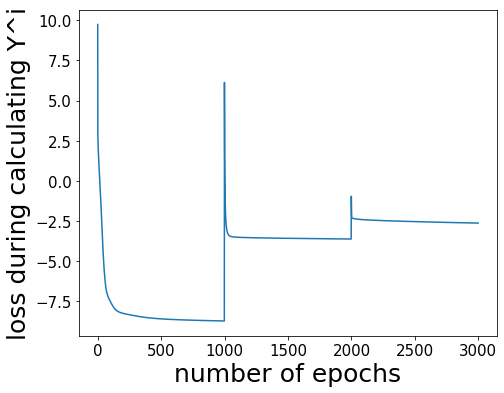

In [ ]:
plt.plot(np.arange(num_epochs),l_set)# s = 0.1
#plt.ylim((52,53))
plt.xlabel('number of epochs')
plt.ylabel('loss during calculating Y^i')
plt.show() 

In [ ]:
Y_output = net_Y(testdata.float())
EQY_output = torch.mean(Y_output*output,0)
print(np.round(EQY_output.cpu().detach().numpy(), 2))
print(np.round(Example.EQ_Y.cpu().detach().numpy(), 2))

[ 1.11  0.88  0.75  0.22 -0.45 -1.09 -0.06 -0.66 -2.37 -2.11]
[ 1.12  0.89  0.74  0.18 -0.47 -1.08 -0.16 -0.75 -2.34 -2.11]


In [ ]:
torch.sum(EQY_output)

tensor(-3.8379, device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
(EQY_output-Example.EQ_Y).cpu().detach().numpy()

array([-0.00548516, -0.00608798,  0.01027683,  0.03386179,  0.02089306,
       -0.01453411,  0.04018549,  0.08561732, -0.03094755,  0.0001018 ])

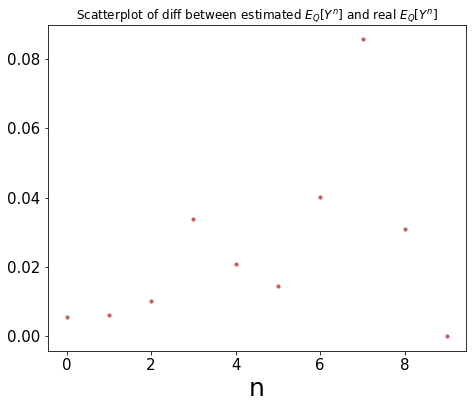

Relative error of predicted fair risk allocation: 2.480%.


In [ ]:
import matplotlib.pyplot as plt
diff_EXP = torch.abs((EQY_output-Example.EQ_Y))#/Example.EQ_Y
plt.scatter(np.arange(n_institutions),diff_EXP.cpu().detach().numpy(),s = 10, color="indianred")
#plt.ylim((0, 0.1))
plt.xlabel('n')
plt.title(r'Scatterplot of diff between estimated $E_Q[Y^n]$ and real $E_Q[Y^n]$' )#relative 
#plt.legend()
plt.show()
print(f"Relative error of predicted fair risk allocation: {torch.mean(diff_EXP)*100:.3f}%.")
#print(diff_EXP*Example.EQ_Y, Example.EQ_Y)

In [ ]:
torch.mean(diff_EXP)/torch.mean(torch.abs(Example.EQ_Y))

tensor(0.0252, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward0>)